<a href="https://www.kaggle.com/code/ramsesmdlc/mnist-linear-classification?scriptVersionId=139736831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# __0. Libraries__

In [38]:
#Import Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib as mpl # data visualization
import matplotlib.pyplot as plt # data visualization ("pyplot module", a.k.a. "plt")

    #Each "pyplot" function makes some change to a figure: e.g., creates a figure, creates a...
    #...plotting area in a figure, plots some lines in a plotting area, decorates the plot with...
    #...labels, etc. The various plots we can utilize using Pyplot are Line Plot, Histogram, Scatter,...
    #...3D Plot, Image, Contour, and Polar.

from sklearn.linear_model import SGDClassifier # Machine Learning Model (Linear Classification)
from sklearn.model_selection import cross_val_predict #Generating predictions from the Training Set

    #Performance Measures used in Classification Models
from sklearn.metrics import confusion_matrix #Performance Measure (Confusion Matrix)
from sklearn.metrics import ConfusionMatrixDisplay #Performance Measure (Plot Confusion Matrix)

from sklearn.metrics import precision_score, recall_score #Performance Measure (Precision and Recall Score)
from sklearn.metrics import f1_score #Performance Measure (F1 Score)
from sklearn.metrics import precision_recall_curve #Performance Measure (Precision Recall Curve)
from sklearn.metrics import roc_curve #Performance Measure (ROC Curve)
from sklearn.metrics import roc_auc_score #Performance Measure (ROC Curve AUC Score)

# __1. Important__

Type of machine learning system to build:

1. Supervised Learning: __Linear Classification__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __It is to take an image of a handwritten single digit, and determine what that digit is.__

2. __Metric__: This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# __2. Loading the Data - Training Dataset__

In [39]:
training_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

## __2.1. General Information__

1. The data file contain __gray-scale images__ of hand-drawn digits, from 0 through 9.

2. Each image is __28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.__

> __Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel__, with higher numbers meaning darker. 

> This pixel-value is an integer between 0 and 255, inclusive.

> __Each pixel is a feature__.

3. The __training data set, has 785 columns__. The first column, called "label", is the digit that was drawn by the user. The __rest of the columns contain the pixel-values of the associated image__.

4. __Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive__. 

> For example: To locate this pixel ("pixel31") on the image, "pixel31" indicates the pixel is in the fourth column from the left, and the second row from the top.

# __3. Exploratory Data Analysis (EDA) - Training Dataset__

In [40]:
def EDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe - some metric variables:",'\033[0m', training_data.shape, "\n")
    
  # Print the "keys" of the dataframe
  print('\033[1m','\033[94m',"Keys of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_data.keys())  
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_data.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe - some metric variables:",'\033[0m', "\n")
  training_data.info()
 
  # Print the "number and percentage" of missing values per column" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of some metric variables of the dataframe:", '\033[0m' + "\n")
  missing = training_data.isnull().sum()
  percent = missing / training_data.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))
    
# Call the function
EDA(training_data)


  Shape of the dataframe - some metric variables:  (42000, 785) 

  Keys of the dataframe - some metric variables:  

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
  Head of the dataframe - some metric variables:  

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0

## __3.1. Adjusting the Training Dataset__

1. If we want to see the data (as an image), we should consider what is described in the section "2.1. General Information" (i.e. __the pixel's value of the image of every number is entirely displayed in one single row composed by 784 values); therefore, it is necessary rescaling the data (i.e. rescale each row from a shape of {1 x 784} pixels to {28 x 28} pixels.__

2. Before applying the "reshape" function, we need to transform our dataset from "Pandas dataframe" to a "Numpy Array", because the "Numpy Array" has the function "reshape" available.

In [41]:
#Separating the Y and X values (i.e. dependent and independent variables)
Y_training, X_training = training_data["label"],training_data.iloc[:, 1:785] 

#Printing the "shape" of the dependent and independent variables (separately)
print(Y_training.shape)
print(X_training.shape)

#Printing the "type" of the dependent and independent variables (separately)
print(type(Y_training))
print(type(X_training))

#Transforming the "independent variables" (from Pandas Dataframe to Numpy Array)
array_X = X_training.to_numpy()
print(array_X)

#Printing the "shape" of the independent variables (as a Numpy Array)
print(array_X.shape) 

(42000,)
(42000, 784)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 784)



   Target Value of the Image:  

0

   Value of every pixel of the image (28 x 28 pixels):  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1  25 130 155 254
 254 254 157  30   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   8 103 253 253 253 253 253 253 253 253 114   2   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  11 208 253 253 253
 253 253 253 253 253 253 253 107   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  31 253 253 253 253 253 253 253 253 253 253 253 215
 101   3   0   0   0   0   0 

<function matplotlib.pyplot.show(close=None, block=None)>

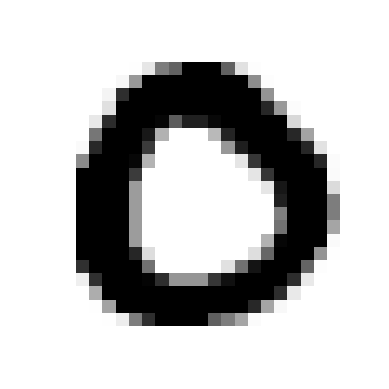

In [42]:
#Printing the image of a number (just to check!)

#Digit of row N°5, counting from 0,1,2,3,4 (without rescaling)
    #If we see the section "3. Exploratory Data Analysis (EDA) - Training Dataset", the output should
    #...be the number zero (0)
digitx1 = array_X[4]
print("\n", '\033[1m','\033[94m',"Target Value of the Image:",'\033[0m', "\n")
print(Y_training[4])
print("\n", '\033[1m','\033[94m',"Value of every pixel of the image (28 x 28 pixels):",'\033[0m', "\n")
print(digitx1)

#Digit of row N°5 (with rescaling)
digitx1_image = digitx1.reshape(28, 28)

#The matplotlibe function "imshow":
    #Display data as an image.
    #The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a...
    #...pseudocolor image. For displaying a grayscale image set up the colormapping using the...
    #...parameters cmap='gray', vmin=0, vmax=255.
    #The number of pixels used to render an image is set by the Axes size and the dpi of the figure.
print("\n", '\033[1m','\033[94m',"Image (28 x 28 pixels):",'\033[0m', "\n")
plt.imshow(digitx1_image,cmap="binary")
plt.axis("off")
plt.show 


   Target Value of the Image:  

1

   Value of every pixel of the image (28 x 28 pixels):  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3 141
 139   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   9 254 254   8   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   9 254 254   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   9 254 254 106   0   0   0   0
   0   0   0   0   0   0   0 

<function matplotlib.pyplot.show(close=None, block=None)>

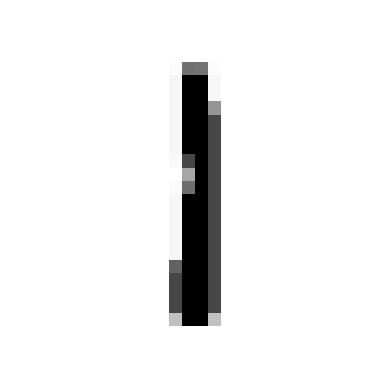

In [43]:
#Printing the image of a number (just to check!)

#Digit of row N°3, counting from 0,1,2 (without rescaling)
    #If we see the section "3. Exploratory Data Analysis (EDA) - Training Dataset", the output should
    #...be the number one (1)
digitx2 = array_X[2]
print("\n", '\033[1m','\033[94m',"Target Value of the Image:",'\033[0m', "\n")
print(Y_training[2])
print("\n", '\033[1m','\033[94m',"Value of every pixel of the image (28 x 28 pixels):",'\033[0m', "\n")
print(digitx2)

#Digit of row N°3 (with rescaling)
digitx2_image = digitx2.reshape(28, 28)

#The matplotlibe function "imshow":
    #Display data as an image.
    #The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a...
    #...pseudocolor image. For displaying a grayscale image set up the colormapping using the...
    #...parameters cmap='gray', vmin=0, vmax=255.
    #The number of pixels used to render an image is set by the Axes size and the dpi of the figure.
print("\n", '\033[1m','\033[94m',"Image (28 x 28 pixels):",'\033[0m', "\n")
plt.imshow(digitx2_image,cmap="binary")
plt.axis("off")
plt.show 

# __4. Training Model (Binary Classifier) - Training Dataset__

1. __Binary Classifier__: distinguish between two classes. Some models are:

> Logistic Regression

> Support Vector Machines

> SGD Classifier

2. __Multiclass Classifier__: distinguish between two or more classes. Some models are:

> SGD Classifier

> Random Forests Classifiers

> Naive Bayes Classifiers

In [44]:
#Considering a "Binary Classifier" approach, we are going to build a model to detect the number nine (9).

#Model to use: SGDClassifier. It is named in our code as "sgd_bin_clf"

#Defining the two classes (because we are talking about a "Binary Classifier"):
    #Class N°1: all numbers that are nine (9) in the dataset of images.
    #Class N°2: all numbers that are not nine (9) in the dataset of images.

#Defining Class N°1: 
    #It works like a boolean (True or False), without deleting any row. Jut putting "True" the rows...
    #...with the "target value nine (9)".
y_train_9 = (Y_training == 9) 

#Defining the model for the training phase
    #SGD (Stochastic Gradient Descent). 
    #The model is a "linear support vector machine" (SVM) by default, but it can be changed.

#random_state
    #It is an argument from the function "SGDClassifier"
    #It is used for "shuffling the data", when "shuffle" is set to "True".
    #It is useful for reproducibility of outputs across multiple function calls.
    #If you dont want to change the global "seed" value and only want to set the "state" for one task,..
    #...random_state is used. 
#random.seed()    
    #It is a function, not an argument.
    #It is little bit differente from the argument "random_state"
    #The effect of setting the "seed" is global as it will end up effecting all functions.
sgd_bin_clf = SGDClassifier(random_state = 42)
    #Both sets "X_training" and "y_train_9" have the same number of rows (i.e., 42000)
sgd_bin_clf.fit(X_training, y_train_9)

#The output of our model (based on the training set) apparently are good, considering that we should...
#...detect the image of number nine (9) and the first three outputs fo the array show...
#..."False, False, False" because those number's images belong to the numbers "1,0,1" (accordingly...
#...to section "3. Exploratory Data Analysis (EDA) - Training Dataset")
print("\n", '\033[1m','\033[94m',"Output of the Training Phase:",'\033[0m', "\n")
sgd_bin_clf.predict(X_training)


   Output of the Training Phase:  



array([False, False, False, ..., False, False,  True])

# __5. Performance Measures - Training Model (Binary Classifier) - Training Dataset__

## __5.1. Confusion Matrix__

__Key ideas:__

1. The basic idea is to __count the number of time an item (instance) of a specific class (for example: Class W) is classified as another class (for example: Class H)__. In other words, this method allows us to extract information about the model's performance and __determine if the model is "confused" in discriminating between classes.__

2. This method can be __used for "Binary Classification" and "Multiclass Classification".__

3. Each __row__ of the "Confusion Matrix" __represents "True Class = Ground Truth".__

4. Each __column__ of the "Confusion Matrix" __represents "Predicted Class".__

5. In a ideal world, we want a Confusion Matrix that shows maximum metrics of "True Positive" and "True Negative" and minimum metrics of "False Positive" and "False Negative".


   Confusion Matrix:  

[[36771  1041]
 [ 1366  2822]]

   Plot of the Confusion Matrix:  



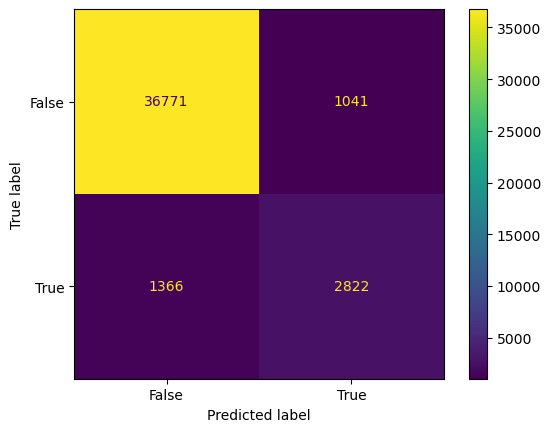

In [45]:
#Step 1 (Cross-Validation)
    #It generate "cross-validated estimates" (also called "pseudo-predictions") for each input data point...
    #...In other words, this function returns for "each element in the input", the "prediction" that...
    #...was obtained for that "element when it was in the test set". during the "Cross-Validation process".
        #In this step we are going to generate "predictions" using the training data.        
        #Then those "predictions" will be compared to the known target values (because all data values..
        #...used in this Step 1 belong to the "training set").
    
    #cv:
        #The data is splitted according to the "cv" parameter. 
        #It is the "cross-validation generator" (default=None).
        #Determines the "cross-validation" splitting strategy. 
        #Possible inputs for "cv" are:
            #None (to use the default 5-fold cross validation).
            #int (to specify the number of folds in a ""(Stratified)KFold".
        #If the "estimator" (also called model, which in our case is called "sgd_bin_clf") is a...
        #..."classifier" and the "dependent variable" is either "binary or multiclass", the...
        #..."StratifiedKFold" is used. 

y_train_pred = cross_val_predict(sgd_bin_clf, X_training, y_train_9, cv=5)
    
#Step 2 (Confusion Matrix)
    #We are going to generate the "Confusion Matrix" using the "training data" and the "predictions"...
    #...(from the previous step; i.e., from the Step 1)
    
    #Confusion Matrix
        #Compute "confusion matrix" to evaluate the "accuracy" of a classification.
        #By definition a confusion matrix "C" is such that "Cij" is equal to the number of "observations...
        #...known" to be in group "i" (rows) and "predicted" to be in group "j" (columns)
        #In binary classification, the count is:
            #true negatives = C00 (left upper quadrant)
            #false negatives = C10 (left lower quadrant)
            #true positives = C11 (right lower quadrant)
            #false positives = C01 (right upper quadrant)

#The output of the confusion matrix will shows us that there are:
    # 36771 images classified correctly as non-9s
    # 1366  images classified wrongly as non-9s
    # 1041  images classified wrongly as 9s
    # 2822  images classified correclty as 9s
print("\n", '\033[1m','\033[94m',"Confusion Matrix:",'\033[0m', "\n")
cm = confusion_matrix(y_train_9, y_train_pred)
print(cm)

print("\n", '\033[1m','\033[94m',"Plot of the Confusion Matrix:",'\033[0m', "\n")
disp_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sgd_bin_clf.classes_)
disp_confusion_matrix.plot()
plt.show()

## __5.2. Precision and Recall__

__Key ideas:__

1. __These metrics are considered more precise than the information from "Confusion Matrix"__ described on section "5.1. Confusion Matrix"; therefore, we are going to use them. By definition a confusion matrix "C" is such that "Cij" is equal to the number of "observations known" to be in group "i" (rows) and "predicted" to be in group "j" (columns):
 
 > true negatives = C00 (left upper quadrant)
 
 > false negatives = C10 (left lower quadrant)
 
 > true positives = C11 (right lower quadrant)
 
 > false positives = C01 (right upper quadrant)

2. __Precision__: this metric allow us to know how reliable is a model when it tries to classify "true positive" values. In other words, with this metric we are going to answer the following question: __What portion of all values classified as "positive" (i.e., "false positive" + "true positive") are really "true positive" values?__

> We should try to maximize this metric.

> This metric is __based on "detected values" ("True Positive" and "False Positive")__. In other words, this metric takes into account a group of values (correctly and wrongly) classified as positive. 

> __Precision Equation = TP / (TP+FP)__; where "TP: True Positive" and "FP: False Positive".

3. __Recall__: this metric allow us to know how many "positive values" were detected among "all possible positive values" (i.e., "detected positive" values and "non-detected postive" values).

> It is __also called "Sensitivity" or "True Positive Rate" (TPR).__

> "False positive" values, which are considered "negative samples" wrongly classified, are neglected by this metric. 

> This metric is __based on "detected values" and "non-detected postive" values.__

> __Recall Equation = TP / (TP+FN)__; where "TP: True Positive" and "FN: False Negative".

4. Relationship between Precision and Recall metrics

|Precision Score|Recall Score|Comment
|--|--|--|
|High|Low|The model correctly classify the "true positive" values, but due to the low value of the "Recall" metric (i.e., few points of data "detected as positive" values), we are computing the "Precision" metric with just a few points of data|
|Low|High|The model correctly detects the "positive values", but we need to be careful because the model can also detect too many "False Positive" values. Consequently, this impacts the "Precision" metric.|

In [46]:
#Computation Precision and Recall

#Precision
    #The model will show (output) a Precision metric of 73.05% (i.e., the model will be correct...
    #...about a class assignment {in this case the number nine (9)} 73.05% of the time.)
print("\n", '\033[1m','\033[94m',"Precision Score:",'\033[0m', "\n")
print(precision_score(y_train_9, y_train_pred))

#Recall
    #The model will show (output) a Recall metric of 67.38% (i.e., the model will detect...
    #...67.38% of "positive values" {in this case the number nine (9)} among "all possible positive...
    #...values" (i.e., "detected positive" values and "non-detected postive" values). 
print("\n", '\033[1m','\033[94m',"Recall Score:",'\033[0m', "\n")
print(recall_score(y_train_9, y_train_pred))


   Precision Score:  

0.7305203209940461

   Recall Score:  

0.6738299904489016


## __5.3. F1 Score__

__Key ideas:__

1. This metric is very __useful when comparing models.__

2. It works like a __mean of the "Precision" and "Recall" metrics.__

3. It __ranges from 0 (low values of both "Precision" and "Recall" metric.) to +1 (high values of both "Precision" and "Recall" metric.)__ 

4. It __favours models with similar "Precision" and "Recall" scores__. It is important to take into account the following:

> In __some contexts it is better to have higher "Recall" scores__. For instance: in self-driving, detecting pedestrians with the cameras and sensors.

> In __some contexts it is better to have higher "Precision" scores__. For instance: detecting cancer or HIV on patients.

5. __F1 Equation = (2 x Precision x Recall)/(Precision + Recall)__

In [47]:
#F1
    #The model will show (output) a F1 metric of 0.70.
print("\n", '\033[1m','\033[94m',"F1 Score:",'\033[0m', "\n")
print(f1_score(y_train_9, y_train_pred))


   F1 Score:  

0.7010309278350515


## __5.4. Precision and Recall Tradeoff (Plot of "Precision and Recall vs Decision Threshold")__

__Key ideas:__

1. This detailed analysis is useful if one considers deeply the relevance of the __"Precision and Recall Tradeoff" versus the "Decision Threshold"__. In some ways this analysis is based on the information described in section "5.3. F1 Score".

2. "Decision Threshold":  __it is the boundary that determines if an instance is classified as "Positive" or "Negative"__; therefore, a change in the "Decision Threshold" also means a change in the composition of the quadrants that belong to the "Confusion Matrix", "Precision", "Recall" and "F1" scores. The following table describes in a better way the __behavior of the scores ("Precision and Recall") when the "Decision Threshold" is modified__:

|Decision Threshold Value|Precision Score|Recall Score
|--|--|--|
|Increase|Increase (not always)|Decrease|
|Decrease|Decrease|Increase|

3. The __decision for a specific value for the "Decision Threshold" will depend on the context of our project__ (as was described in "5.3. F1 Score".)

4. __Important__: This graph will help if we are interested in __finding the "threshold value" from a specific "Precision Value" or "Recall Value".__

In [48]:
#Finding the "scores" of our training dataset.

    #By default, the model "SGDClassifier" use a "Decision Threshold = 0".
    
    #Using the argument (method= "decision_function") of the function "cross_val_predict()" we are going...
    #...determine the "score" of each instance of our training set. These "scores" are going to be taken...
    #...into account to make changes in the position or value of the "Decision Threshold".
    
    #Decision function: 
        #It is a method present in classifier such as "SVC and Logistic Regression" in...
        #...sklearn machine learning framework. 
        #This method basically returns a Numpy array of scores, in which each score lies...
        #...to the right or left side of the "Hyperplane" (in this case the "Hyperplane" is the...
        #...Decision Threshold".); therefore, this boundary determines if an instance is classified...
        #...as "Positive" or "Negative".

y_train_scores = cross_val_predict(sgd_bin_clf, X_training, y_train_9, cv=5, method="decision_function")
print("\n", '\033[1m','\033[94m',"Scores of the Training Set:",'\033[0m', "\n")
print(y_train_scores)
print("\n", '\033[1m','\033[94m',"Shape of the array of Scores of the Training Set:",'\033[0m', "\n")
print(y_train_scores.shape)


   Scores of the Training Set:  

[-12400.75169759 -32514.56583626  -4628.26094165 ...  -8865.37289682
 -58884.48154644   8118.79458436]

   Shape of the array of Scores of the Training Set:  

(42000,)


In [49]:
#Finding the "Recall and Precision" metrics of the training set (i.e. compute precision-recall pairs for...
#...different thresholds.)

    #Extremely Important: This implementation is restricted to the "binary classification".
    
    #It is important to remember that in this step is computed the "Precision and Recall" based...
    #...on the "True binary labels" (i.e. the set "y_train_9") and "scores of the training set" (found...
    #...in the previous step).
        
    #In some way, this process is similar to section "5.2. Precision and Recall", in which we compute the...
    #..."Precision and Recall" metrics based on the "training data" and our "selected class" ("y_train_9")..
    #...But in this case we compute the "Precision and Recall" metrics based on the scores of ...
    #..."training data" and our "selected class" ("y_train_9").
    
    #Extremely Important: the "last precision and recall" values" are "1. and 0."" respectively and do...
    #... not have a corresponding #threshold". This ensures that the graph starts on the y axis...
    #...Therefore, we are going to see the in the output that:
        #Shape of the array "precisions" = 42001 instea of 42000
        #Shape of the array "recalls" = 42001 instea of 42000

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_train_scores)
print("\n", '\033[1m','\033[94m',"Precision, Recall and Threshold",'\033[0m', "\n")
print(precisions, recalls, thresholds)
print("\n", '\033[1m','\033[94m',"Shape of the array precisions:",'\033[0m', "\n")
print(precisions.shape)
print("\n", '\033[1m','\033[94m',"Shape of the array recalls:",'\033[0m', "\n")
print(recalls.shape)
print("\n", '\033[1m','\033[94m',"Shape of the thresholds:",'\033[0m', "\n")
print(thresholds.shape)


   Precision, Recall and Threshold  

[0.09971429 0.09971666 0.09971903 ... 0.5        1.         1.        ] [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.38777459e-04
 2.38777459e-04 0.00000000e+00] [-155088.83301218 -129617.19814113 -129609.36416315 ...   25152.85013362
   25597.10946096   27899.05137432]

   Shape of the array precisions:  

(42001,)

   Shape of the array recalls:  

(42001,)

   Shape of the thresholds:  

(42000,)


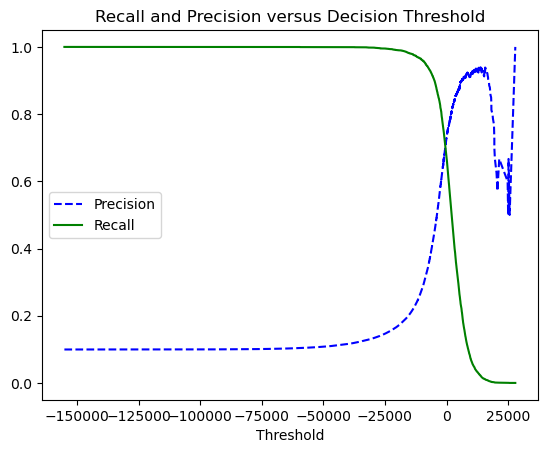

In [50]:
#Plotting the "Recall and Precision versus Decision Threshold" metrics of the training set...
#...(i.e. compute precision-recall pairs for different thresholds.)

    #Some portions of the graph will show (output) the "Precision Line" going down when the "threshold"...
    #...is raised. It could be strange, but sometimes happen.
    
    #Extremely Important: the "last precision and recall" values" are "1. and 0."" respectively and do...
    #... not have a corresponding #threshold". This ensures that the graph starts on the y axis...
    #...Therefore, we are going to see the in the output that:
        #Shape of the array "precisions" = 42001 instea of 42000
        #Shape of the array "recalls" = 42001 instea of 42000
        #precisions [:-1]
        #recalls [:-1]
    
def plot_precision_recall_threshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label="Recall")
    plt.title("Recall and Precision versus Decision Threshold")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    
plot_precision_recall_threshold (precisions, recalls, thresholds)
plt.show()

## __5.5. Precision and Recall Tradeoff (Plot of "Precision vs Recall")__

__Key ideas:__

1. The __decision for a specific value for the "Decision Threshold" will depend on the context of our project__ (as was described in "5.3. F1 Score".)

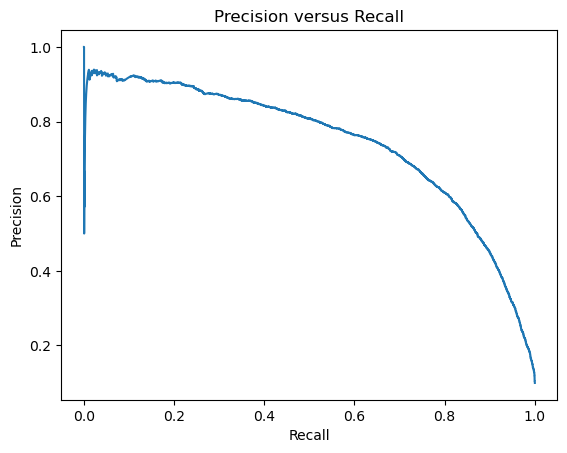

In [51]:
#Plotting the "Recall vs Precision" metrics of the training set

    #We are going to take the values generated in section "5.4. Precision and Recall Tradeoff...
    #...(Plot of "Precision and Recall vs Decision Threshold")"
plt.plot(recalls,precisions)
plt.title("Precision versus Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## __5.6. ROC Curve__

__Key ideas:__

1. It __evaluates the quality of binary or multiclass classifiers.__

2. ROC Curve (also called "Receiver Operating Characteristic" Curve) plots the "Recall", also called "Sensitivity" or "True Positive Rate" (TPR) against the "False Positive Rate" (FPR). 

> FPR: ratio of "negative values" wrongly classified as "positive values".

> TNR: ratio of "negative values" correctly classified as "negatve values". It is also called "Specificity".

> TNR = 1 - FPR

3. 

ROC curves are typically used in binary classification, where the TPR and FPR can be defined unambiguously. In the case of multiclass classification, a notion of TPR or FPR is obtained only after binarizing the output. This can be done in 2 different ways:

    the One-vs-Rest scheme compares each class against all the others (assumed as one);

    the One-vs-One scheme compares every unique pairwise combination of classes.


In [52]:
#Finding the "False Positive Rate (FPR) and True Positive Rate (TPR)" metrics of the training set...
#...(i.e. compute "False Positive Rate (FPR) and True Positive Rate (TPR)" for different thresholds.)

    #Extremely Important: This implementation is restricted to the "binary classification".
    
    #It is important to remember that in this step is computed the "Precision and Recall" based...
    #...on the "True binary labels" (i.e. the set "y_train_9") and "scores of the training set" (found...
    #...in the previous step).
        
    #In some way, this process is similar to section "5.2. Precision and Recall", in which we compute the...
    #..."Precision and Recall" metrics based on the "training data" and our "selected class" ("y_train_9")..
    #...But in this case we compute the "Precision and Recall" metrics based on the scores of ...
    #..."training data" and our "selected class" ("y_train_9").
    
    #Extremely Important: the "last precision and recall" values" are "1. and 0."" respectively and do...
    #... not have a corresponding #threshold". This ensures that the graph starts on the y axis...
    #...Therefore, we are going to see the in the output that:
        #Shape of the array "precisions" = 42001 instea of 42000
        #Shape of the array "recalls" = 42001 instea of 42000

fp_rate, tp_rate, thresholds2 = roc_curve(y_train_9, y_train_scores)

print("\n", '\033[1m','\033[94m',"False Positive Rate (FPR), True Positive Rate (TPR), Threshold",'\033[0m', "\n")
print(fp_rate, tp_rate, thresholds2)
print("\n", '\033[1m','\033[94m',"Shape of the array False Positive Rate (FPR):",'\033[0m', "\n")
print(precisions.shape)
print("\n", '\033[1m','\033[94m',"Shape of the array True Positive Rate (TPR):",'\033[0m', "\n")
print(tp_rate.shape)
print("\n", '\033[1m','\033[94m',"Shape of the thresholds:",'\033[0m', "\n")
print(thresholds2.shape)


   False Positive Rate (FPR), True Positive Rate (TPR), Threshold  

[0.00000000e+00 0.00000000e+00 2.64466307e-05 ... 9.69427695e-01
 9.69427695e-01 1.00000000e+00] [0.00000000e+00 2.38777459e-04 2.38777459e-04 ... 9.99761223e-01
 1.00000000e+00 1.00000000e+00] [  27900.05137432   27899.05137432   25597.10946096 ...  -65487.63109952
  -65512.72295384 -155088.83301218]

   Shape of the array False Positive Rate (FPR):  

(42001,)

   Shape of the array True Positive Rate (TPR):  

(3595,)

   Shape of the thresholds:  

(3595,)


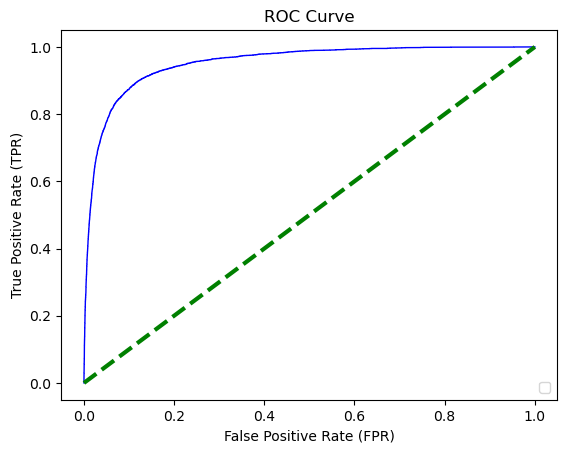

In [58]:
#XXXX

#Plotting the "Recall and Precision versus Decision Threshold" metrics of the training set...
#...(i.e. compute precision-recall pairs for different thresholds.)

    #Some portions of the graph will show (output) the "Precision Line" going down when the "threshold"...
    #...is raised. It could be strange, but sometimes happen.
    
    #Extremely Important: the "last precision and recall" values" are "1. and 0."" respectively and do...
    #... not have a corresponding #threshold". This ensures that the graph starts on the y axis...
    #...Therefore, we are going to see the in the output that:
        #Shape of the array "precisions" = 42001 instea of 42000
        #Shape of the array "recalls" = 42001 instea of 42000
        #precisions [:-1]
        #recalls [:-1]
#Key information about the graph:
    #ROC curves typically feature "true positive rate" (TPR) on the Y axis, and...
    #..."false positive rate" (FPR) on the X axis. This means that the #top left corner# of the plot...
    #....is the “ideal” point - a FPR of zero, and a TPR of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. The “steepness” of ROC curves is also important, since it is ideal to maximize the TPR while minimizing the FPR.   
    
def plot_fpr_tpr_threshold (fp_rate, tp_rate, label=None):
    plt.plot(fp_rate, tp_rate,"b-",linewidth = 1, label=label)
    plt.plot([0,1], [0,1],"g--",linewidth = 3)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    
plot_fpr_tpr_threshold(fp_rate, tp_rate)
plt.show()

# __<span style="color:red">UNFINISHED NOTEBOOK! - I AM STILL WORKING ON IT!</span>__

## __5.7. ROC AUC__

# __References__

1. **Hands-on Machine Learning with Scikit Learn, Keras and TensorFlow (Second Edition)**
> Aurélien Gerón